In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from string import ascii_lowercase
from itertools import combinations

import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import  GradientBoostingClassifier

from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

train = pd.read_csv('./open data/train.csv')
test = pd.read_csv('./open data/test_x.csv')

<AxesSubplot:>

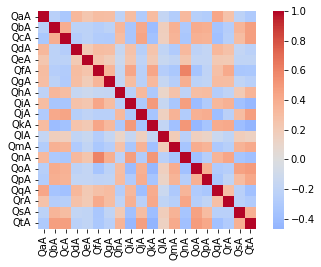

In [5]:
eda_train = train.copy()
Answers = ['QaA', 'QbA', 'QcA', 'QdA', 'QeA',
             'QfA', 'QgA', 'QhA', 'QiA', 'QjA', 
             'QkA', 'QlA', 'QmA', 'QnA', 'QoA', 
             'QpA', 'QqA', 'QrA', 'QsA', 'QtA']
correlations = eda_train[Answers].corr(method = 'spearman')
sns.heatmap(correlations, cmap="coolwarm", square=True, center=0)

[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]


<AxesSubplot:>

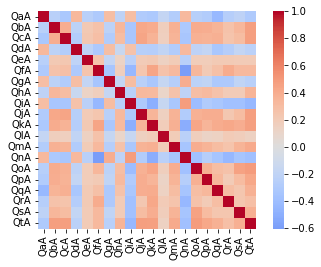

In [6]:
for col in eda_train[Answers]:
    print(sorted(eda_train[col].unique()))
    
flipping_columns = ["QeA", "QfA", "QkA", "QqA", "QrA"]
for flip in flipping_columns: 
    eda_train[flip] = 6 - eda_train[flip]

correlations = eda_train[Answers].corr(method = 'spearman')
sns.heatmap(correlations, cmap="coolwarm", square=True, center=0)

C:\Users\hhz20\anaconda3\envs\sklearn\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hhz20\anaconda3\envs\sklearn\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='delay', ylabel='Density'>

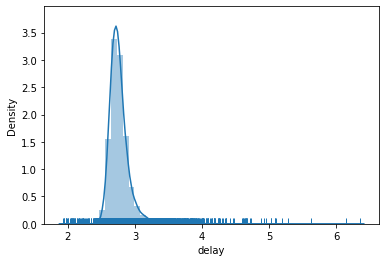

In [7]:
questions = [i for i in list(ascii_lowercase)[:20]]
eda_train['delay'] = eda_train[[('Q'+i+'E') for i in questions]].sum(axis=1)

eda_train['delay'] = eda_train['delay'] ** (1/10)
sns.distplot(eda_train['delay'], rug = True)

In [12]:
x_train

,age_group,education,engnat,familysize,gender,married,race,religion,urban,wf_01,...,QqA_dv_QsA,QqA_dv_QtA,QrA_dv_QsA,QrA_dv_QtA,QsA_dv_QtA,Ex,Ag,Con,Es,Op
0,3,2,1,4,0,3,6,10,1,0,...,2.000000,4.0,2.000000,4.00,2.00,1,5,-2,3,-1
1,2,4,2,3,0,1,1,7,3,0,...,0.250000,1.0,1.250000,5.00,4.00,-1,2,-4,0,-3
2,3,3,1,3,1,2,6,10,2,0,...,1.000000,1.0,2.000000,2.00,1.00,-2,-1,-5,-4,0
3,2,4,2,0,0,1,1,7,3,0,...,0.750000,0.6,0.500000,0.40,0.80,-1,-3,-2,0,-2
4,2,3,1,2,1,2,6,0,1,0,...,1.000000,0.5,1.000000,0.50,0.50,-1,-1,-5,-4,-6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45527,1,2,1,1,0,1,6,8,3,0,...,0.800000,1.0,1.000000,1.25,1.25,-5,1,6,5,-2
45528,3,2,1,2,1,1,6,1,1,0,...,1.000000,1.0,0.750000,0.75,1.00,-1,1,-2,-2,-4
45529,1,2,1,1,0,1,6,5,2,0,...,0.333333,1.0,0.333333,1.00,3.00,3,-4,0,-3,-6
45530,4,4,1,2,1,1,6,1,0,0,...,0.500000,2.0,0.500000,2.00,4.00,0,1,-2,-2,-4


In [14]:
test

,age_group,education,engnat,familysize,gender,married,race,religion,urban,wf_01,...,QqA_dv_QsA,QqA_dv_QtA,QrA_dv_QsA,QrA_dv_QtA,QsA_dv_QtA,Ex,Ag,Con,Es,Op
0,1,2,2,3,1,1,6,6,2,0,...,3.000000,1.50,2.000000,1.000000,0.500000,0,1,-2,0,-3
1,1,2,2,2,1,1,5,3,3,0,...,0.666667,0.50,0.333333,0.250000,0.750000,0,0,0,0,0
2,3,3,2,7,1,2,5,5,1,0,...,1.000000,0.60,0.666667,0.400000,0.600000,5,0,1,4,5
3,6,4,1,4,1,2,6,3,2,0,...,0.250000,1.00,1.250000,5.000000,4.000000,-6,-5,-4,-5,-6
4,1,2,1,3,1,1,6,0,2,0,...,0.750000,1.00,0.500000,0.666667,1.333333,6,4,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11378,2,3,2,3,0,1,5,3,0,0,...,1.000000,0.50,2.000000,1.000000,0.500000,-3,1,0,1,-5
11379,1,2,2,1,0,1,1,0,2,0,...,0.600000,0.75,1.000000,1.250000,1.250000,-4,0,2,6,-4
11380,3,4,1,4,1,2,6,1,1,0,...,1.000000,2.00,1.000000,2.000000,2.000000,2,-1,-5,-6,-4
11381,4,2,1,3,0,2,6,1,2,0,...,0.500000,1.00,1.000000,2.000000,2.000000,2,-5,-5,-5,-5


In [8]:
x_train = train.copy()
x_train.drop('voted', axis=1, inplace = True)
y_train = train['voted']

dataset = [x_train, test]

questions = [i for i in list(ascii_lowercase)[:20]]
answers = [('Q'+i+'A') for i in questions]

for data in dataset:
  data['T'] = data['QcA'] - data['QfA'] + data['QoA'] - data['QrA'] + data['QsA']
  data['V'] = data['QbA'] - data['QeA'] + data['QhA'] + data['QjA'] + data['QmA'] - data['QqA']
  data['M'] = - data['QkA']

flipping_columns = ["QeA", "QfA", "QkA", "QqA", "QrA"]
for data in dataset:
  for flip in flipping_columns: 
    data[flip] = 6 - data[flip]
    
flipping_secret_columns = ["QaA", "QdA", "QgA", "QiA", "QnA"]
for data in dataset:
  for flip in flipping_secret_columns: 
    data[flip] = 6 - data[flip]
    
for data in dataset:
  data['Mach_score'] = data[answers].mean(axis = 1)

for data in dataset:
  data['delay'] = data[[('Q'+i+'E') for i in questions]].sum(axis=1)
  data['delay'] = data['delay'] ** (1/10)
    
Ancoms = list(combinations(answers, 2))
for data in dataset:
  for a,b in Ancoms:
    data['%s_dv_%s'%(a,b)] = data[a]/data[b]
    
for data in dataset:
  data.drop([('Q'+i+'A') for i in questions], axis = 1, inplace = True)
  data.drop([('Q'+i+'E') for i in questions], axis = 1, inplace = True)
    
for data in dataset:
  data.drop('hand', axis=1, inplace = True)

wr_list = [('wr_0'+str(i)) for i in range(1,10)]
wr_list.extend([('wr_'+str(i)) for i in range(10,14)])
wr_no_need = [i for i in wr_list if i not in ['wr_01', 'wr_03', 'wr_06', 'wr_09', 'wr_11']]

for data in dataset:
  data.drop(wr_no_need, axis=1, inplace = True)

for data in dataset:
  data['Ex'] = data['tp01']-data['tp06']
  data['Ag'] = data['tp07']-data['tp02']
  data['Con'] = data['tp03']-data['tp08']
  data['Es'] =data['tp09']-data['tp04']
  data['Op'] =data['tp05']-data['tp10']

for data in dataset:
  data.drop([('tp0'+str(i)) for i in range(1,10)], axis=1, inplace = True)
  data.drop('tp10', axis = 1, inplace = True)
    
index = test['index']
for data in dataset:
  data.drop('index', axis = 1, inplace = True)

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
needenco = ['age_group', 'gender', 'race', 'religion']
for i in needenco:
  x_train[i] = encoder.fit_transform(x_train[i])
  test[i] = encoder.transform(test[i])

C:\Users\hhz20\AppData\Local\Temp\ipykernel_17348\23903272.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['%s_dv_%s'%(a,b)] = data[a]/data[b]
C:\Users\hhz20\AppData\Local\Temp\ipykernel_17348\23903272.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['%s_dv_%s'%(a,b)] = data[a]/data[b]
C:\Users\hhz20\AppData\Local\Temp\ipykernel_17348\23903272.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joinin

# Model1

In [22]:
from sklearn.model_selection import train_test_split

tr_x, va_x, tr_y, va_y = train_test_split(x_train, y_train, test_size=0.25, random_state=71,shuffle=True)

In [ ]:
from sklearn.metrics import log_loss

model = Model()
model.fit(tr_x,tr_y,va_x,va_y)
va_pred = model.predict(va_x)
score = log_loss(va_y, va_pred)
print(score)

In [10]:
k_fold = KFold(n_splits = 3, shuffle = True, random_state = 0)

In [36]:
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score

clf1 = RandomForestClassifier(n_estimators=500) # 이거 대신에 CatBoostClassifier넣었을때 올라감
clf2 = LGBMClassifier()
clf3 = GradientBoostingClassifier()
# 소프트 보팅 : 최종 아웃풋 결과의 확률값을 기반으로 평균을 내어, 이중 가장 확률값이 높은 아웃풋을 최종 아웃풋으로 설정한다.
soft_vote  = VotingClassifier([('r1',clf1), ('r2', clf2), ('r3',clf3)], voting='soft')
# soft_vote.fit(x_train, y_train)

# model = soft_vote
# pred_y = model.predict_proba(test)
soft_vote.fit(tr_x,tr_y)
va_pred = soft_vote.predict(va_x)
score = log_loss(va_y, va_pred)
acc = accuracy_score(va_y, va_pred)
print(acc)

# pred_y = pred_y[:,1]
# print(pred_y)
# print('보팅 분류기의 정확도: {0: .4f}'.format(accuracy_score(y_test, pred)))
# submission = pd.DataFrame({
#     "index" : index,
#     "voted" : pred_y
# })

# submission.to_csv('./open data/model1__.csv', index=False)

Learning rate set to 0.046525
0:	learn: 0.6783300	total: 14.2ms	remaining: 14.2s
1:	learn: 0.6681873	total: 29.3ms	remaining: 14.6s
2:	learn: 0.6560105	total: 43.5ms	remaining: 14.5s
3:	learn: 0.6461633	total: 57.6ms	remaining: 14.3s
4:	learn: 0.6384648	total: 73.7ms	remaining: 14.7s
5:	learn: 0.6323336	total: 89.5ms	remaining: 14.8s
6:	learn: 0.6265456	total: 106ms	remaining: 15.1s
7:	learn: 0.6220919	total: 122ms	remaining: 15.1s
8:	learn: 0.6174926	total: 137ms	remaining: 15.1s
9:	learn: 0.6138061	total: 152ms	remaining: 15s
10:	learn: 0.6103772	total: 166ms	remaining: 15s
11:	learn: 0.6055702	total: 179ms	remaining: 14.8s
12:	learn: 0.6026412	total: 194ms	remaining: 14.7s
13:	learn: 0.5997325	total: 211ms	remaining: 14.9s
14:	learn: 0.5973693	total: 226ms	remaining: 14.9s
15:	learn: 0.5937901	total: 238ms	remaining: 14.7s
16:	learn: 0.5904894	total: 250ms	remaining: 14.5s
17:	learn: 0.5884389	total: 263ms	remaining: 14.4s
18:	learn: 0.5855649	total: 275ms	remaining: 14.2s
19:	learn

174:	learn: 0.5426043	total: 2.35s	remaining: 11.1s
175:	learn: 0.5423981	total: 2.37s	remaining: 11.1s
176:	learn: 0.5423217	total: 2.38s	remaining: 11.1s
177:	learn: 0.5422225	total: 2.39s	remaining: 11s
178:	learn: 0.5419614	total: 2.4s	remaining: 11s
179:	learn: 0.5418488	total: 2.42s	remaining: 11s
180:	learn: 0.5417486	total: 2.43s	remaining: 11s
181:	learn: 0.5416116	total: 2.44s	remaining: 11s
182:	learn: 0.5414957	total: 2.46s	remaining: 11s
183:	learn: 0.5413739	total: 2.47s	remaining: 11s
184:	learn: 0.5412665	total: 2.48s	remaining: 10.9s
185:	learn: 0.5411162	total: 2.5s	remaining: 10.9s
186:	learn: 0.5410166	total: 2.51s	remaining: 10.9s
187:	learn: 0.5409107	total: 2.52s	remaining: 10.9s
188:	learn: 0.5407969	total: 2.54s	remaining: 10.9s
189:	learn: 0.5407156	total: 2.55s	remaining: 10.9s
190:	learn: 0.5405865	total: 2.56s	remaining: 10.9s
191:	learn: 0.5404808	total: 2.58s	remaining: 10.8s
192:	learn: 0.5403653	total: 2.59s	remaining: 10.8s
193:	learn: 0.5401406	total:

349:	learn: 0.5178588	total: 4.67s	remaining: 8.68s
350:	learn: 0.5176955	total: 4.69s	remaining: 8.67s
351:	learn: 0.5175611	total: 4.7s	remaining: 8.66s
352:	learn: 0.5174153	total: 4.71s	remaining: 8.64s
353:	learn: 0.5172568	total: 4.73s	remaining: 8.63s
354:	learn: 0.5171796	total: 4.74s	remaining: 8.61s
355:	learn: 0.5170475	total: 4.75s	remaining: 8.6s
356:	learn: 0.5169209	total: 4.76s	remaining: 8.58s
357:	learn: 0.5167822	total: 4.78s	remaining: 8.57s
358:	learn: 0.5166236	total: 4.79s	remaining: 8.55s
359:	learn: 0.5164831	total: 4.8s	remaining: 8.54s
360:	learn: 0.5163212	total: 4.82s	remaining: 8.53s
361:	learn: 0.5161996	total: 4.83s	remaining: 8.51s
362:	learn: 0.5160394	total: 4.84s	remaining: 8.5s
363:	learn: 0.5158934	total: 4.86s	remaining: 8.49s
364:	learn: 0.5157176	total: 4.87s	remaining: 8.47s
365:	learn: 0.5155723	total: 4.89s	remaining: 8.46s
366:	learn: 0.5155122	total: 4.9s	remaining: 8.45s
367:	learn: 0.5153677	total: 4.91s	remaining: 8.43s
368:	learn: 0.515

523:	learn: 0.4944253	total: 7.02s	remaining: 6.38s
524:	learn: 0.4942942	total: 7.03s	remaining: 6.36s
525:	learn: 0.4941899	total: 7.04s	remaining: 6.35s
526:	learn: 0.4940458	total: 7.06s	remaining: 6.33s
527:	learn: 0.4939260	total: 7.07s	remaining: 6.32s
528:	learn: 0.4938025	total: 7.08s	remaining: 6.31s
529:	learn: 0.4936728	total: 7.1s	remaining: 6.29s
530:	learn: 0.4935496	total: 7.11s	remaining: 6.28s
531:	learn: 0.4934128	total: 7.12s	remaining: 6.26s
532:	learn: 0.4932829	total: 7.13s	remaining: 6.25s
533:	learn: 0.4931321	total: 7.15s	remaining: 6.24s
534:	learn: 0.4930074	total: 7.16s	remaining: 6.22s
535:	learn: 0.4929085	total: 7.17s	remaining: 6.21s
536:	learn: 0.4927768	total: 7.18s	remaining: 6.19s
537:	learn: 0.4926596	total: 7.19s	remaining: 6.18s
538:	learn: 0.4925401	total: 7.21s	remaining: 6.16s
539:	learn: 0.4923434	total: 7.22s	remaining: 6.15s
540:	learn: 0.4922317	total: 7.23s	remaining: 6.14s
541:	learn: 0.4921201	total: 7.25s	remaining: 6.12s
542:	learn: 0

685:	learn: 0.4750647	total: 9.15s	remaining: 4.19s
686:	learn: 0.4750304	total: 9.16s	remaining: 4.17s
687:	learn: 0.4748918	total: 9.17s	remaining: 4.16s
688:	learn: 0.4747576	total: 9.18s	remaining: 4.14s
689:	learn: 0.4746493	total: 9.19s	remaining: 4.13s
690:	learn: 0.4745506	total: 9.21s	remaining: 4.12s
691:	learn: 0.4744192	total: 9.22s	remaining: 4.1s
692:	learn: 0.4743034	total: 9.23s	remaining: 4.09s
693:	learn: 0.4741985	total: 9.24s	remaining: 4.08s
694:	learn: 0.4740633	total: 9.26s	remaining: 4.06s
695:	learn: 0.4739824	total: 9.27s	remaining: 4.05s
696:	learn: 0.4738455	total: 9.29s	remaining: 4.04s
697:	learn: 0.4737284	total: 9.3s	remaining: 4.02s
698:	learn: 0.4736192	total: 9.31s	remaining: 4.01s
699:	learn: 0.4735030	total: 9.32s	remaining: 4s
700:	learn: 0.4733786	total: 9.34s	remaining: 3.98s
701:	learn: 0.4733095	total: 9.35s	remaining: 3.97s
702:	learn: 0.4731653	total: 9.36s	remaining: 3.96s
703:	learn: 0.4730474	total: 9.37s	remaining: 3.94s
704:	learn: 0.472

852:	learn: 0.4567901	total: 11.5s	remaining: 1.98s
853:	learn: 0.4566755	total: 11.5s	remaining: 1.97s
854:	learn: 0.4565904	total: 11.5s	remaining: 1.96s
855:	learn: 0.4564935	total: 11.6s	remaining: 1.94s
856:	learn: 0.4564195	total: 11.6s	remaining: 1.93s
857:	learn: 0.4563337	total: 11.6s	remaining: 1.92s
858:	learn: 0.4562048	total: 11.6s	remaining: 1.9s
859:	learn: 0.4561043	total: 11.6s	remaining: 1.89s
860:	learn: 0.4560116	total: 11.6s	remaining: 1.88s
861:	learn: 0.4559053	total: 11.6s	remaining: 1.86s
862:	learn: 0.4558567	total: 11.7s	remaining: 1.85s
863:	learn: 0.4557113	total: 11.7s	remaining: 1.84s
864:	learn: 0.4556129	total: 11.7s	remaining: 1.83s
865:	learn: 0.4555046	total: 11.7s	remaining: 1.81s
866:	learn: 0.4554150	total: 11.7s	remaining: 1.8s
867:	learn: 0.4553133	total: 11.8s	remaining: 1.79s
868:	learn: 0.4551940	total: 11.8s	remaining: 1.77s
869:	learn: 0.4551182	total: 11.8s	remaining: 1.76s
870:	learn: 0.4549921	total: 11.8s	remaining: 1.75s
871:	learn: 0.

In [29]:
!pip install catboost

     ---------------------------------------- 73.9/73.9 MB 3.9 MB/s eta 0:00:00
     ---------------------------------------- 15.2/15.2 MB 4.8 MB/s eta 0:00:00


In [34]:
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score


model = CatBoostClassifier()
# 소프트 보팅 : 최종 아웃풋 결과의 확률값을 기반으로 평균을 내어, 이중 가장 확률값이 높은 아웃풋을 최종 아웃풋으로 설정한다.
# soft_vote  = VotingClassifier([('r1',clf1), ('r2', clf2), ('r3',clf3)], voting='soft')
# soft_vote.fit(x_train, y_train)

# model = soft_vote
# pred_y = model.predict_proba(test)
model.fit(tr_x,tr_y)
va_pred = model.predict(va_x)
# score = log_loss(va_y, va_pred)
acc = accuracy_score(va_y, va_pred)
print(acc)

# pred_y = pred_y[:,1]
# print(pred_y)
# print('보팅 분류기의 정확도: {0: .4f}'.format(accuracy_score(y_test, pred)))
# submission = pd.DataFrame({
#     "index" : index,
#     "voted" : pred_y
# })

# submission.to_csv('./open data/model1__.csv', index=False)

0.6741632258631293


In [ ]:
pred_y

In [ ]:
clf1 = RandomForestClassifier(n_estimators=500)
clf2 = LGBMClassifier()
clf3 = GradientBoostingClassifier()
# 소프트 보팅 : 최종 아웃풋 결과의 확률값을 기반으로 평균을 내어, 이중 가장 확률값이 높은 아웃풋을 최종 아웃풋으로 설정한다.
soft_vote  = VotingClassifier([('r1',clf1), ('r2', clf2), ('r3',clf3)], voting='soft')
soft_vote.fit(x_train, y_train)

model = soft_vote
pred_y = model.predict(test)
pred_y = pred_y[:,1]
print('보팅 분류기의 정확도: {0: .4f}'.format(accuracy_score(test, pred_y)))
submission = pd.DataFrame({
    "index" : index,
    "voted" : pred_y
})

submission.to_csv('./open data/model1.csv', index=False)

In [ ]:
import pandas as pd
import numpy as np

from string import ascii_lowercase
from itertools import combinations

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestRegressor
import eli5
from eli5.sklearn import PermutationImportance

import matplotlib.pyplot as plt

import warnings
import gc
warnings.filterwarnings("ignore")

train = pd.read_csv('./open data/train.csv')
test = pd.read_csv('./open data/test_x.csv')

x_train = train.copy()
x_train.drop('voted', axis=1, inplace = True)
y_train = train['voted']

dataset = [x_train, test]